In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pkt
import scipy

In [2]:
# dataset download
kashti =  sns.load_dataset('titanic')
kashti.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Normal Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

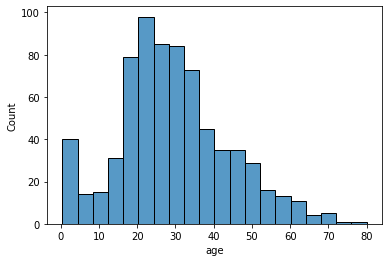

In [24]:
#  visual test
sns.histplot(kashti['age'])

In [25]:
# Shapiro wilk test
from scipy.stats import shapiro
stat, p = shapiro(kashti['age'])
if p > 0.05:
    print('Probably Gaussian')
else: 
    print('Probably not Gaussian')

ShapiroResult(statistic=0.9814548492431641, pvalue=7.322165629375377e-08)

<AxesSubplot:xlabel='fare', ylabel='Count'>

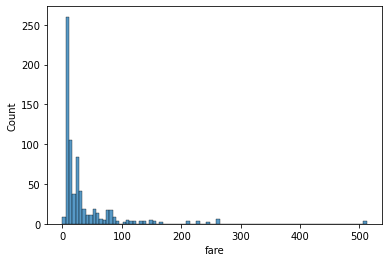

In [23]:
sns.histplot(kashti['fare'])

In [7]:
kashti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# kashti.isna().sum()
# kashti["age"] = kashti["age"].dropna()
# kashti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
kashti.dropna(subset=['age'], axis=0, inplace=True)
kashti.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

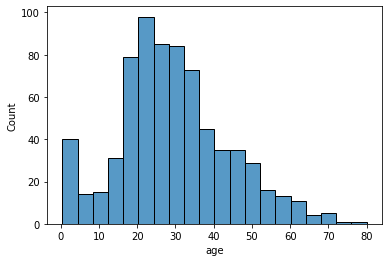

In [27]:
# visual test
sns.histplot(kashti['age'])

In [26]:
# Shapiro wilk test
from scipy.stats import shapiro
stat, p = shapiro(kashti['age'])
if p > 0.05:
    print('Probably Gaussian')
else: 
    print('Probably not Gaussian')

Probably not Gaussian


In [12]:
# age sex and fare
df = kashti[['sex', 'age', 'fare']]
df.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


In [20]:
# t.test to compare the age of male vs females

#1- import libraries
from scipy.stats import ttest_ind 
#2- subsets of male vs female
df_male = df[df['sex']== "male"]
df_female = df[df['sex']== "female"]
#3- t.test(aun-paired, two sample/ or independent t.tes) 
ttest_ind(df_male['age'], df_female['age'])
stat, p_value = ttest_ind(df_male['age'], df_female['age']) 

print("stat =", stat, "p=", p_value)
#4- conditional loop, different or not? 
if p_value > 0.05:
    print('There is no significant difference')
else: 
    print('There is a significant difference')

stat = 2.499206354920835 p= 0.012671296797013709
There is a significant difference


In [21]:
#  one sample ttest:
# is me 1 value ko dousri non value k sath compare krte hn

#1- import libraries
from scipy.stats import ttest_1samp
#2- subsets of male vs female
df_male = df[df['sex']== "male"]
df_female = df[df['sex']== "female"]
#3- t.test(aun-paired, two sample/ or independent t.tes) 
ttest_1samp(df_male['age'], 36)
stat, p_value = ttest_1samp(df_male['age'], 36)

print("stat =", stat, "p=", p_value)
#4- conditional loop, different or not? 
if p_value > 0.05:
    print('There is no significant difference')
else: 
    print('There is a significant difference')

stat = -7.646511009251602 p= 1.2523613407424712e-13
There is a significant difference


apka task ye hai poorey data me se males ka classes k sath compare kren to kya hoga, Paired sample ttest hoga\
agr ap sirf first and 3rd class k males ko compare kren to you can do paired analysis\
apne male k agey 2 characters le len hen or agey isi trah se test laga kr loop laga dena hai ye wala.\